# Visualize task fMRI activation maps (and RDMs)

In [74]:
import numpy as np
import nibabel as nib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import hcp_utils as hcp
import tools
import nilearn.plotting as plotting
from importlib import reload
tools = reload(tools)
import wbplot

#### Set up basic parameters

In [87]:
networkdef = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)

# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[indsort]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360

sortednets = np.sort(list(xticks.keys()))
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

glasserfilename = '/home/ti236/AnalysisTools/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser = np.squeeze(nib.load(glasserfilename).get_data())

<ipython-input-87-9afc30f2422d>:33: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  glasser = np.squeeze(nib.load(glasserfilename).get_data())


In [30]:
subIDs=['02','03','04','06','08','09','10','12','14','15','18','20','22','25','27','29','31','17','19','21','24','26','28','30']
# subIDs=['03','04','06','08','09','12','14','15','18','20','22','27','29','31','17','19','21','24','26','28','30']
runs = range(1,9)

In [92]:
data, task_index = tools.loadTaskActivations('02_a1',1,space='vertex')

In [86]:
roi

359

In [85]:
roi_ind

array([  689,   690,   691,   692,   693,   694,   695,   696,  1600,
        1601,  1613,  1614,  1623,  1624,  1633,  1634,  1635,  1641,
        1642,  1643,  1644,  1649,  1650,  1651,  1652,  1655,  1656,
        1657,  1658,  1659,  1660,  1661,  1662,  1663,  1664,  1665,
        1666,  1667,  1668,  1669,  1670,  1671,  1672,  1673,  1674,
        1675,  1676,  1677,  1678,  1679, 25774, 25775, 25814, 25815,
       25853, 25854, 25855, 25891, 25892, 25893, 25894, 25929, 25930,
       25931, 25932, 25967, 25968, 25969, 26003, 26004, 26005, 26039,
       26040, 26073, 26074, 26107, 26139])

In [83]:
glasser

array([215., 219., 192., ..., 133., 133., 133.])

In [91]:
glasser

array([215., 219., 192., ..., 133., 133., 133.], dtype=float32)

In [88]:
data_64k = np.zeros((len(glasser),data.shape[1]))
for roi in range(360):
    roi_ind = np.where(glasser==roi+1)[0]
    data_64k[roi_ind,:] = data[roi,:]

In [78]:
data[0:180,0]=0

In [99]:
data[:29706,0] = 0

In [98]:
59412/2

29706.0

In [102]:
wbplot.dscalar('test.png',data[:59412,0],cbar=True)

TypeError: dscalar() got an unexpected keyword argument 'cbar'

In [103]:
from IPython.display import Image
Image(filename='test.png')

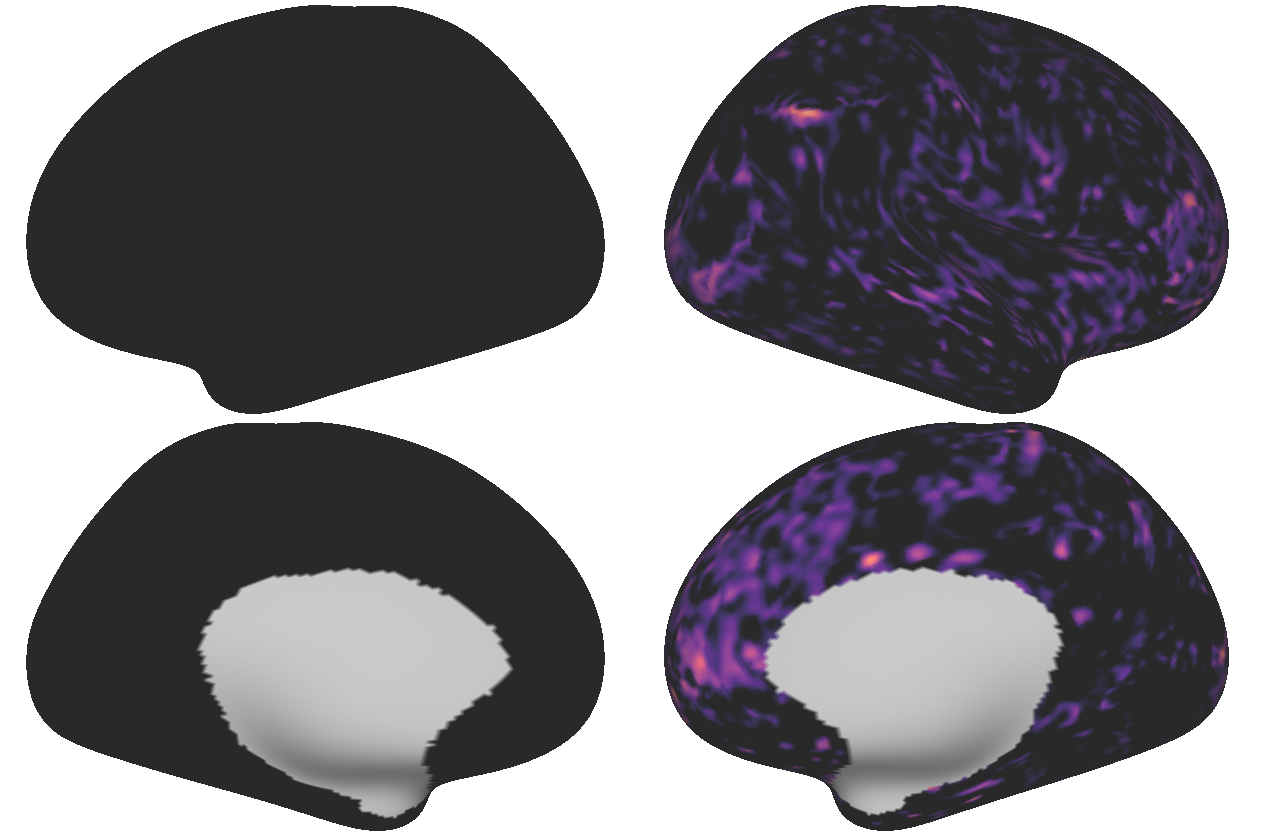

In [104]:
ax

In [41]:
hcp.unparcellate(data[:,0], hcp.mmp)

IndexError: index 360 is out of bounds for axis 0 with size 360

In [57]:
data_64k.shape

(1, 27)

In [67]:
help(plotting.view_surf)

Help on function view_surf in module nilearn.plotting.html_surface:

view_surf(surf_mesh, surf_map=None, bg_map=None, threshold=None, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x2b934bbb7e80>, black_bg=False, vmax=None, vmin=None, symmetric_cmap=True, colorbar=True, colorbar_height=0.5, colorbar_fontsize=25, title=None, title_fontsize=25)
    Insert a surface plot of a surface map into an HTML page.
    
    Parameters
    ----------
    surf_mesh: str or list of two numpy.ndarray
        Surface mesh geometry, can be a file (valid formats are
        .gii or Freesurfer specific files such as .orig, .pial,
        .sphere, .white, .inflated) or
        a list of two Numpy arrays, the first containing the x-y-z coordinates
        of the mesh vertices, the second containing the indices
        (into coords) of the mesh faces.
    
    surf_map: str or numpy.ndarray, optional.
        Data to be displayed on the surface mesh. Can be a file (valid formats
        are .gii,

In [108]:
help(hcp.cortex_data)

Help on function cortex_data in module hcp_utils.hcp_utils:

cortex_data(arr, fill=0, vertex_info={'grayl': array([    0,     1,     2, ..., 32489, 32490, 32491]), 'grayr': array([    0,     1,     2, ..., 32489, 32490, 32491]), 'num_meshl': 32492, 'num_meshr': 32492})
    Takes a 1D array of fMRI grayordinates and returns the values on the vertices of the full cortex mesh which is neccessary for surface visualization. 
    The unused vertices are filled with a constant (zero by default).



In [106]:
plotting.view_surf(hcp.mesh.very_inflated, 
    hcp.cortex_data(data_64k[:,1]), 
    threshold=None, bg_map=hcp.mesh.sulc,cmap='bwr')

ValueError: Mismatch between number of nodes in mesh (64984) and size of surface data (59412)